<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



### Integrantes:

* Carignano, Hugo. 
* Diaz, Federico.
* Villafañe, Roxana Noelia. 

<a name="exploratory_data_analysis"></a>
## **Consignas para la materia Aprendisaje Supervisado**

### 1 General 
*FECHA LíMITE DE ENTREGA: 12/09*

Realizar un informe en formato notebook, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañer@s de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia " Introducción al Aprendisaje Automático". Asimismo, el mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles accionar a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.



### 2 Consignas de Aprendisaje Supervisado

Esta entrega es una continuación del trabajo anterior, donde se agregan nuevos algoritmos para evaluar en nuestro dataSet. 

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

##### Preparando el dataSet:

Utilizar la configuración del dataset empleada en el trabajo anterior, en lo que respecta al balanceo del dataset. 

  1- Recordar que en nuestro caso podemos realizar clasificación binaria (ccb y csb) . Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

  2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir las mas representativas.

##### Explorarción de algoritmos de clasificación: 
 1. Entrenar el modelo sin parámetros y tomarlo como baseline. Revisar documentación para identificar los parámetros correspondientes.

 2. Utilizar CV para encontrar los parámetros para encontrar el mejor modelo de cada uno de ellos. 
 
 3. Graficar la métrica elegida con respecto al cambio de los parámetros en los conjuntos 'test' y 'train'.

 4. Hacer una tabla para comparar los mejores modelos de cada algoritmo.
 
 5. Visualizar los resultados por medio de:
    * Matriz de Confusión
    * Reporte de Clasificación
    * Curvas ROC
 
Explorar los algoritmos:
 * Regresión Logistica 
 * NaiveBayes
 * SVM

Probar luego métodos de [ensemble](https://scikit-learn.org/stable/modules/ensemble.html#ensemble):
 * Random Forest
 * Boosting
 * Luego probar con los modelos mas sensillos, métodos de voting y ver si mejoran los resultados.
Pueden probar [VotingClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)


Extra si les queda tiempo:
 * Redes neuronales, con las imágenes como datos de entrada. 

 
Automatizar lo mas posible el proceso. 

Recordar de documentar los pasos que están llevando a cabo, comentar el código, plantear inconvenientes y contar lo que encontraron, poner conclusiones :).



### 3 Corriendo la Notebook

Clonar el donde están las imágenes y luego moverse entre las carpetas. 

In [ ]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob


In [ ]:
!pip install scikit-optimize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.metrics import plot_precision_recall_curve
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from skopt import gp_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import (
    plot_convergence,
    plot_evaluations,
    plot_objective,
)
from skopt import dump, load
from keras.models import Sequential, load_model
from xgboost import XGBClassifier

In [ ]:
from skopt import gp_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import callbacks
from skopt.callbacks import CheckpointSaver
import os
import sys

### Ingresamos los datos

In [ ]:
train = pd.read_csv("https://gitlab.com/diegobcuadro/mentoria-deteccion-de-objetos-en-imagenes/-/raw/master/dataset/dataSet_train_crop_features_labels.csv", index_col=0, low_memory=False)

In [ ]:
test = pd.read_csv('https://gitlab.com/diegobcuadro/mentoria-deteccion-de-objetos-en-imagenes/-/raw/master/dataset/dataSet_test_crop_features_labels.csv', index_col=0, low_memory=False )

In [ ]:
#chequeamos que esten bien ingresados los datos
train.head()

filename  width  ...      2046      2047
0  Video1-frame-000001_single_box_0.jpg    640  ...  0.574400  0.002943
1  Video1-frame-000002_single_box_0.jpg    640  ...  0.584723  0.016324
2  Video1-frame-000003_single_box_0.jpg    640  ...  0.363607  0.022648
3  Video1-frame-000005_single_box_0.jpg    640  ...  0.441648  0.007727
4  Video1-frame-000006_single_box_0.jpg    640  ...  0.450313  0.105094

[5 rows x 2063 columns]

In [ ]:
#chequeamos que esten bien ingresados los datos
test.head()

filename  width  ...      2046      2047
0  Video1-frame-000004_single_box_0.jpg    640  ...  0.499648  0.015035
1  Video1-frame-000021_single_box_0.jpg    640  ...  0.372580  0.057565
2  Video1-frame-000039_single_box_0.jpg    640  ...  0.631417  0.047634
3  Video1-frame-000040_single_box_0.jpg    640  ...  0.583134  0.020465
4  Video1-frame-000049_single_box_0.jpg    640  ...  0.616542  0.032798

[5 rows x 2063 columns]

In [ ]:
train.shape
test.shape

(495, 2063)

#### Seleccionamos las variables de trabajo

In [ ]:
#seleccionamos las columnas con las que vamos a trabajar
X_train = train[['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]

In [ ]:
y_train = train[['clase']]

In [ ]:
X_test = test[['width', 'height', 'xmin', 'xmax', 'ymin', 'ymax', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B']]

In [ ]:
y_test = test[['clase']]

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y_train) #aca vamos a codificar los labels categoricos

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [ ]:
list(le.classes_) 

['ccb', 'csb']

In [ ]:
y_train_enc = le.transform(y_train)  #aca vamos a transformar los labels categoricos

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train_LE = pd.DataFrame(y_train_enc) #transformamos a pandas dataframe

In [ ]:
#aplicamos las transformaciones en y_test tambien
le.fit(y_test)
y_test_enc = le.transform(y_test)
y_test_LE = pd.DataFrame(y_test_enc)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Con las variables de la ResNet10**

Acá vamos a incluir todas las variables pero haciendo una seleccion dentro del Pipeline del modelo, para automatizar esa seleccion mediante chi cuadrado. 




In [ ]:
train_numeric = train._get_numeric_data()
train_numeric

width  height  xmin  xmax  ...      2044      2045      2046      2047
0       640     360   304   359  ...  0.003393  0.009189  0.574400  0.002943
1       640     360   300   363  ...  0.119403  0.024265  0.584723  0.016324
2       640     360   301   368  ...  0.130680  0.034125  0.363607  0.022648
3       640     360   304   364  ...  0.015458  0.001125  0.441648  0.007727
4       640     360   300   366  ...  0.042033  0.015454  0.450313  0.105094
...     ...     ...   ...   ...  ...       ...       ...       ...       ...
1908   1280     720  1168  1280  ...  0.278505  0.189561  0.501087  0.132643
1909   1280     720  1047  1231  ...  0.205289  0.409898  0.912477  0.043854
1910   1280     720   974  1151  ...  0.162134  0.758789  0.849687  0.150298
1911   1280     720   902  1074  ...  0.440513  0.482803  0.638911  0.262574
1912   1280     720   771   939  ...  0.207461  0.376891  0.677032  0.001313

[1913 rows x 2059 columns]

In [ ]:
test_numeric = test._get_numeric_data()
test_numeric

width  height  xmin  xmax  ...      2044      2045      2046      2047
0      640     360   301   364  ...  0.034357  0.005899  0.499648  0.015035
1      640     360   302   372  ...  0.026713  0.041257  0.372580  0.057565
2      640     360   302   370  ...  0.067228  0.011203  0.631417  0.047634
3      640     360   304   366  ...  0.011560  0.000363  0.583134  0.020465
4      640     360   301   370  ...  0.011605  0.015202  0.616542  0.032798
..     ...     ...   ...   ...  ...       ...       ...       ...       ...
490   1280     720   781   856  ...  0.106780  0.134364  0.511100  0.039986
491   1280     720   634   825  ...  0.150524  0.533963  0.263250  0.056921
492   1280     720   635   838  ...  0.162843  0.578889  0.408409  0.063361
493   1280     720   635   830  ...  0.174382  0.584406  0.256982  0.021594
494   1280     720   408   643  ...  0.222247  0.524002  1.120981  0.179200

[495 rows x 2059 columns]

## Boosting

Boosting es otra estrategia de ensemble que se puede emplear con un amplio grupo de métodos de statistical learning, entre ellos los árboles de decisión. La idea detrás del boosting es ajustar, de forma secuencial, múltiples weak learners (modelos sencillos que predicen solo ligeramente mejor que lo esperado por azar). Cada nuevo modelo emplea información del modelo anterior para aprender de sus errores, mejorando iteración a iteración. En el caso de los árboles de predicción, un weak learners se consigue utilizando árboles con muy pocas ramificaciones. A diferencia del método de bagging (random forest), el boosting no hace uso de muestreo repetido (bootstrapping), la diferencia entre los árboles que forman el ensemble se origina por que la importancia (peso) de las observaciones va cambiando en cada iteración.

Tres de los algoritmos de boosting más empleados son **AdaBoost, Gradient Boosting y Stochastic Gradient Boosting**. Todos ellos se caracterizan por tener una cantidad considerable de hiperparámetros, cuyo valor óptimo se tiene que identificar mediante validación cruzada. Tres de los más importantes son:

* El número de weak learners o número de iteraciones: a diferencia del bagging y random forest, el boosting puede sufrir overfitting si este valor es excesivamente alto. Para evitarlo, se emplea un término de regularización conocido como learning rate.

* Learning rate: controla la influencia que tiene cada weak learner en el conjunto del ensemble, es decir, el ritmo al que aprende el modelo. Suelen recomendarse valores de 0.001 o 0.01, aunque la elección correcta puede variar dependiendo del problema. Cuanto menor sea su valor, más árboles se necesitan para alcanzar buenos resultados pero menor es el riesgo de overfitting.

* Si los weak learners son árboles, el tamaño máximo permitido de cada árbol. Suelen emplearse valores pequeños, entre 1 y 10.

Fuente: https://www.cienciadedatos.net/documentos/33_arboles_de_prediccion_bagging_random_forest_boosting#Boosting


##### Hiperparámetros de XGBoost



Los hiperparámetros del algoritmo se pueden consultar en el siguiente link: 
https://xgboost.readthedocs.io/en/latest/parameter.html

Antes de ejecutar XGBoost, debemos configurar tres tipos de hiperparámetros: parámetros generales, parámetros de refuerzo y parámetros de tareas.

* Los **parámetros generales** se relacionan con qué refuerzo estamos usando para hacer el refuerzo, comúnmente modelo de árbol o lineal

* Los **parámetros de refuerzo** (booster parameters) dependen del refuerzo que haya elegido

* Los **parámetros de la tarea de aprendizaje** deciden el escenario de aprendizaje. Por ejemplo, las tareas de regresión pueden utilizar diferentes parámetros con las tareas de clasificación.

Detallaremos algunos de ellos:

**max_depth [predeterminado = 6]**

Profundidad máxima de un árbol. Aumentar este valor hará que el modelo sea más complejo y más probable que se sobreajuste.

**gamma [predeterminado = 0, alias: min_split_loss]**

Se requiere una reducción mínima de pérdidas para realizar una nueva partición en un nodo hoja del árbol. Cuanto mayor sea la gamma, más conservador será el algoritmo.


**eta [predeterminado = 0.3, alias: learning_rate]**

Reducción del tamaño del paso utilizada en la actualización para evitar el sobreajuste.

**lambda [predeterminado = 1, alias: reg_lambda]**

Plazo de regularización L2 sobre ponderaciones. Incrementar este valor hará que el modelo sea más conservador.

**booster [predeterminado = gbtree]**

Qué booster usar. Puede ser *gbtree, gblinear o dart*; gbtree y dart usan modelos basados ​​en árboles mientras que gblinear usa funciones lineales.

**submuestra [predeterminado = 1]**

Proporción de submuestras de las instancias de formación. Establecerlo en 0.5 significa que XGBoost muestreará al azar la mitad de los datos de entrenamiento antes de hacer "crecer" los árboles; y esto evitará el sobreajuste. El submuestreo ocurrirá una vez en cada iteración de boosting.


**colsample_bytree, colsample_bylevel, colsample_bynode [predeterminado = 1]**

* Se trata de una familia de parámetros para el submuestreo de columnas.

Todos los parámetros **colsample_by** * tienen un rango de (0, 1], el valor predeterminado de 1, y especifican la fracción de columnas que se submuestrearán.

*colsample_bytree* es la proporción de submuestras de columnas al construir cada árbol. El submuestreo ocurre una vez por cada árbol construido.

*colsample_bylevel* es la proporción de submuestras de columnas para cada nivel. El submuestreo ocurre una vez por cada nuevo nivel de profundidad alcanzado en un árbol. Las columnas se submuestrean del conjunto de columnas elegido para el árbol actual.

*colsample_bynode* es la proporción de submuestras de columnas para cada nodo (división). El submuestreo ocurre una vez cada vez que se evalúa una nueva división. Las columnas se submuestrean del conjunto de columnas elegido para el nivel actual.









## XGBoost Classifier

## Baseline

In [ ]:
from xgboost import XGBClassifier

In [ ]:
baseline = XGBClassifier(random_state=42)

In [ ]:
xgb = baseline.fit(train_numeric, y_train_LE)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#modelo con hiperparametros por defecto
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**TRAIN**

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1427
           1       1.00      1.00      1.00       486

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



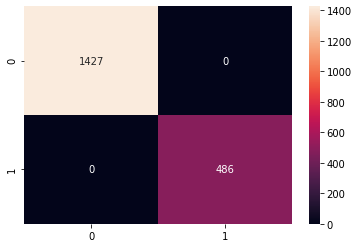

In [ ]:
y_pred_train = xgb.predict(train_numeric)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train_LE, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train_LE, y_pred_train))

**TEST**

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       382
           1       0.98      0.96      0.97       113

    accuracy                           0.99       495
   macro avg       0.98      0.98      0.98       495
weighted avg       0.99      0.99      0.99       495



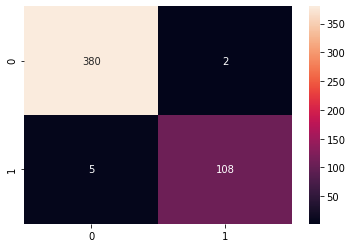

In [ ]:
y_pred_test = xgb.predict(test_numeric)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test_LE, y_pred_test), annot=True, fmt='g')
print(classification_report(y_test_LE, y_pred_test))

## Optimización de Hiperparámetros con Scikit-Optimize

Scikit-Optimize, o skopt, es una biblioteca simple y eficiente para minimizar (muy) costosas y ruidosas funciones de caja negra. Implementa varios métodos para la optimización secuencial basada en modelos. skopt tiene como objetivo ser accesible y fácil de usar en muchos contextos.

La librería está construida sobre NumPy, SciPy y Scikit-Learn.

Para más información visitar: https://scikit-optimize.github.io/stable/index.html


**Definir el espacio de hiperparametros**

In [ ]:
param_grid = [
    #Integer(200, 2500, name='n_estimators'),
    Integer(1, 10, name='max_depth'),
    Real(0.01, 0.99, name='learning_rate'),
    Categorical(['gbtree', 'dart'], name='booster'),
    Real(0.01, 10, name='gamma'),
    Real(0.50, 0.90, name='subsample'),
    Real(0.50, 0.90, name='colsample_bytree'),
    Real(0.50, 0.90, name='colsample_bylevel'),
    Real(0.50, 0.90, name='colsample_bynode'),
    Integer(1, 50, name='reg_lambda'),
]


**Definir el modelo**

In [ ]:
gbm = XGBClassifier(random_state=42)

**Definir la función objetivo**

In [ ]:
@use_named_args(param_grid)
def objective(**params):
    
    # model with new parameters
    gbm.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(
        cross_val_score(
            gbm, 
            train_numeric,
            y_train_LE,
            cv=3,
            n_jobs=-4,
            scoring='accuracy')
    )

    # negate because we need to minimize
    return -value

In [ ]:
checkpoint_saver = CheckpointSaver("./checkpoint.pkl", compress=9) # keyword arguments will be passed to `skopt.dump`

**Optimización Bayesiana**

In [ ]:
%%time

gp_ = gp_minimize(
    objective, # the objective function to minimize
    param_grid, # the hyperparameter space
    n_initial_points=10, # the number of points to evaluate f(x) to start of
    acq_func='EI', # the acquisition function
    n_calls=50, # the number of subsequent evaluations of f(x)
    callback=[checkpoint_saver],
    random_state=0, 
)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

CPU times: user 14min 46s, sys: 12.2 s, total: 14min 58s
Wall time: 14min 42s


In [ ]:
# function value at the minimum.
# note that it is the negative of the accuracy
"Best score=%.4f" % gp_.fun

'Best score=-0.9655'

In [ ]:
#mejores hiperparametros
gp_.x

[10,
 0.01069622459718622,
 'dart',
 0.4124928453216894,
 0.8963096106165482,
 0.7596808167389045,
 0.5327829008152452,
 0.7340283301661158,
 2]

In [ ]:
#pongamos el rotulo a cada hiperparametro
print("""Best parameters:
=========================
- max_depth = %d
- learning_rate = %.6f
- booster = %s
- gamma = %.6f
- subsample = %.6f
- colsample_bytree = %.6f
- colsample_bylevel = %.6f
- colsample_bynode' = %.6f
""" % (gp_.x[0],
       gp_.x[1],
       gp_.x[2],
       gp_.x[3],
       gp_.x[4],
       gp_.x[5],
       gp_.x[6],
       gp_.x[7]))


Best parameters:
- max_depth = 10
- learning_rate = 0.010696
- booster = dart
- gamma = 0.412493
- subsample = 0.896310
- colsample_bytree = 0.759681
- colsample_bylevel = 0.532783
- colsample_bynode' = 0.734028



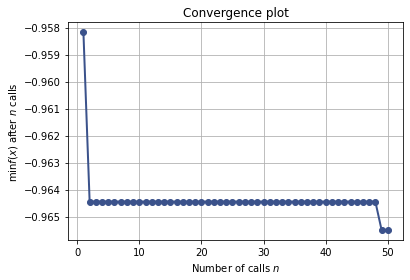

In [ ]:
plot_convergence(gp_)

In [ ]:
dim_names = ['max_depth',
             'learning_rate',
             'booster',
             'gamma',
             'subsample',
             'colsample_bytree',
             'colsample_bylevel',
             'colsample_bynode',
             'reg_lambda',
            ]

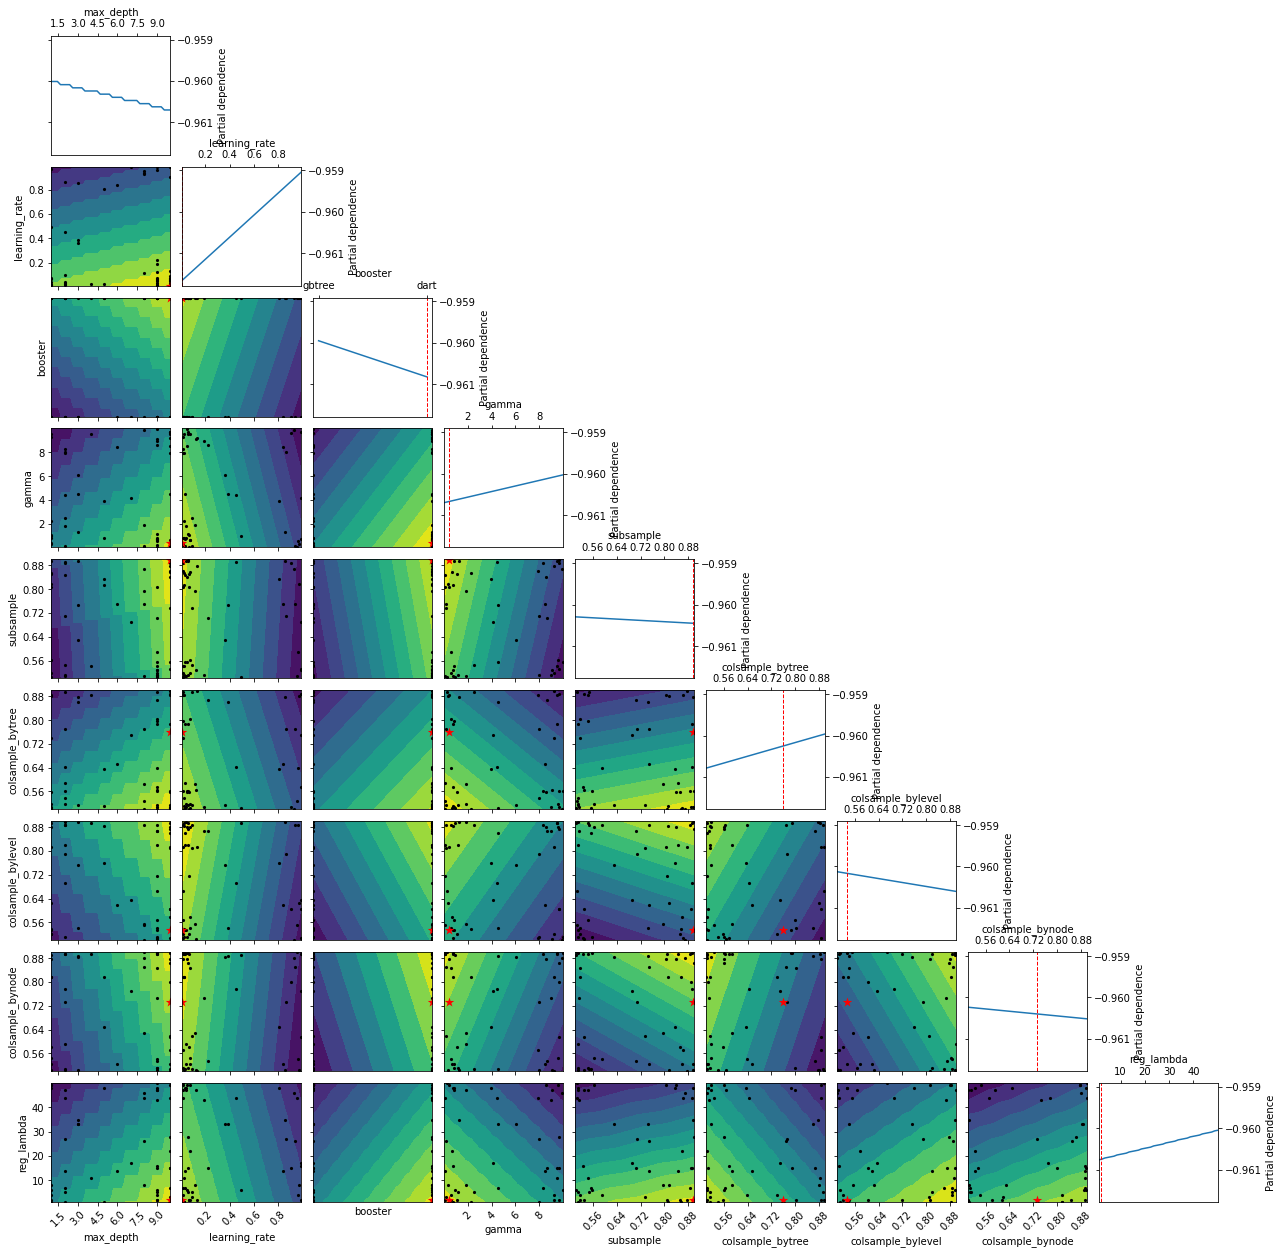

In [ ]:
plot_objective(result=gp_, plot_dims=dim_names)
plt.show()

https://github.com/solegalli/hyperparameter-optimization/blob/master/Section-10-Scikit-Optimize/09-Bayesian-Optimization-xgb-Optional.ipynb

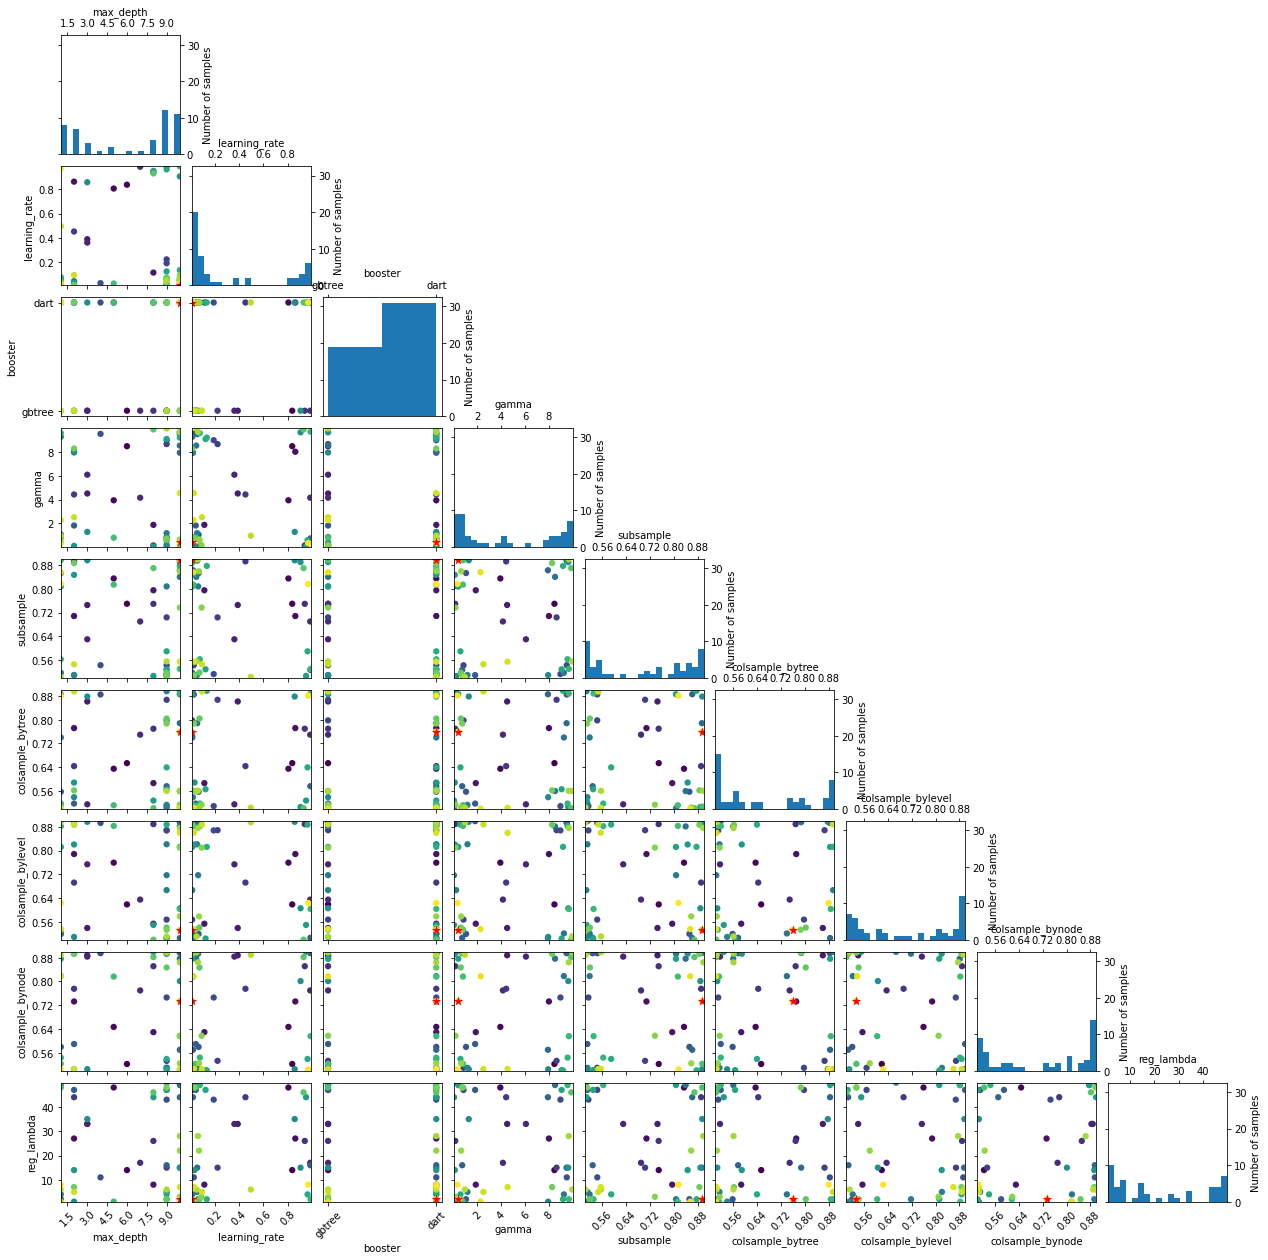

In [ ]:
plot_evaluations(result=gp_, plot_dims=dim_names)
plt.show()

In [ ]:
# all together in one dataframe, so we can investigate further

tmp = pd.concat([
    pd.DataFrame(gp_.x_iters),
    pd.Series(gp_.func_vals),
], axis=1)

tmp.columns = dim_names + ['accuracy']

tmp.sort_values(by='accuracy', ascending=True, inplace=True)

tmp.head()

max_depth  learning_rate booster  ...  colsample_bynode  reg_lambda  accuracy
48         10       0.010696    dart  ...          0.734028           2 -0.965493
38          2       0.012036    dart  ...          0.892741           7 -0.964445
5           3       0.360989  gbtree  ...          0.883580          33 -0.964445
34          5       0.023824    dart  ...          0.816496           1 -0.964445
1           5       0.805925    dart  ...          0.647297          48 -0.964444

[5 rows x 10 columns]

In [ ]:
tmp.shape

(50, 10)

In [ ]:
#para guardar el modelo 
dump(gp_, 'result.pkl')

In [ ]:
#result = gbm.evaluate(x=test_numeric,y=y_test_LE)

Como el tiempo de tunning es largo se puede guardar el modelo

In [ ]:
res_loaded = load('result.pkl')

res_loaded.fun


-0.9654934556412389

In [ ]:
print('Model: ', res_loaded.specs['args'].keys()) #lo que se guardo en el objeto result.pkl

Model:  dict_keys(['func', 'dimensions', 'base_estimator', 'n_calls', 'n_random_starts', 'n_initial_points', 'initial_point_generator', 'acq_func', 'acq_optimizer', 'x0', 'y0', 'random_state', 'verbose', 'callback', 'n_points', 'n_restarts_optimizer', 'xi', 'kappa', 'n_jobs', 'model_queue_size'])


## Predicción con el mejor modelo

Estos son los resultados en el set de train, con los valores con los que optimizaron estos resultados. 

In [ ]:
results_train = gp_.func_vals
results_train

array([-0.95817319, -0.9644436 , -0.95608497, -0.96183455, -0.96235538,
       -0.96444524, -0.96130963, -0.95869648, -0.96182881, -0.96340113,
       -0.95921566, -0.96288031, -0.96183045, -0.9623562 , -0.96078634,
       -0.96235456, -0.96235538, -0.96392442, -0.96235374, -0.96078634,
       -0.96392442, -0.96288031, -0.96130881, -0.96130881, -0.9587014 ,
       -0.95293951, -0.96235456, -0.96340359, -0.95032964, -0.95974059,
       -0.96078798, -0.96288031, -0.96078552, -0.95399346, -0.96444524,
       -0.95973895, -0.95764908, -0.96340195, -0.96444524, -0.96078634,
       -0.96340113, -0.96340113, -0.96392442, -0.95974305, -0.96079044,
       -0.96287784, -0.96235538, -0.96235538, -0.96549346, -0.95869648])

In [ ]:
results_train.mean() #la media de estos valores

-0.9612052151461019

In [ ]:
gp_

          fun: -0.9654934556412389
    func_vals: array([-0.95817319, -0.9644436 , -0.95608497, -0.96183455, -0.96235538,
       -0.96444524, -0.96130963, -0.95869648, -0.96182881, -0.96340113,
       -0.95921566, -0.96288031, -0.96183045, -0.9623562 , -0.96078634,
       -0.96235456, -0.96235538, -0.96392442, -0.96235374, -0.96078634,
       -0.96392442, -0.96288031, -0.96130881, -0.96130881, -0.9587014 ,
       -0.95293951, -0.96235456, -0.96340359, -0.95032964, -0.95974059,
       -0.96078798, -0.96288031, -0.96078552, -0.95399346, -0.96444524,
       -0.95973895, -0.95764908, -0.96340195, -0.96444524, -0.96078634,
       -0.96340113, -0.96340113, -0.96392442, -0.95974305, -0.96079044,
       -0.96287784, -0.96235538, -0.96235538, -0.96549346, -0.95869648])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_res

**Vamos a agregar estos hiperparámetros al algoritmo XGBoostClassifier para continuar con el análisis.**


- max_depth = 10
- learning_rate = 0.010696
- booster = dart
- gamma = 0.412493
- subsample = 0.896310
- colsample_bytree = 0.759681
- colsample_bylevel = 0.532783
- colsample_bynode' = 0.734028




In [ ]:
best_model = XGBClassifier(random_state=42, max_depth=10, learning_rate=0.010696, booster='dart', gamma=0.412493, subsample=0.896310, colsample_bylevel=0.532783, colsample_bynode=0.734028, colsample_bytree=0.759681)

In [ ]:
best_model.fit(train_numeric, y_train_LE)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=0.532783,
              colsample_bynode=0.734028, colsample_bytree=0.759681,
              gamma=0.412493, learning_rate=0.010696, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.89631, verbosity=1)

### Matriz de Confusión y Reporte de Clasificación

**TRAIN**

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1427
           1       1.00      1.00      1.00       486

    accuracy                           1.00      1913
   macro avg       1.00      1.00      1.00      1913
weighted avg       1.00      1.00      1.00      1913



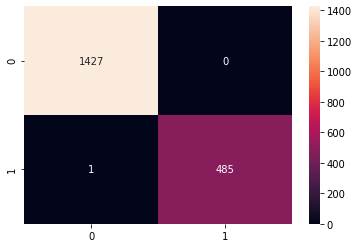

In [ ]:
y_pred_train = best_model.predict(train_numeric)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train_LE, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train_LE, y_pred_train))

**TEST**

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       382
           1       0.99      0.96      0.97       113

    accuracy                           0.99       495
   macro avg       0.99      0.98      0.98       495
weighted avg       0.99      0.99      0.99       495



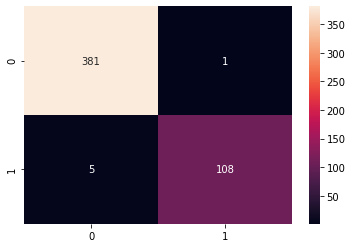

In [ ]:
y_preds = best_model.predict(test_numeric)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test_LE, y_preds), annot=True, fmt='g')
print(classification_report(y_test_LE, y_preds))

## Curvas ROC - Precision Recall

Curva ROC para XGBoost Classifier 



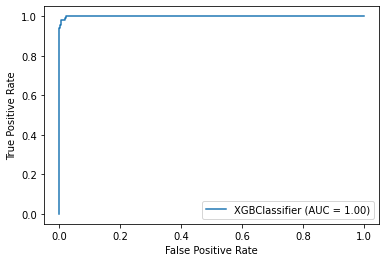

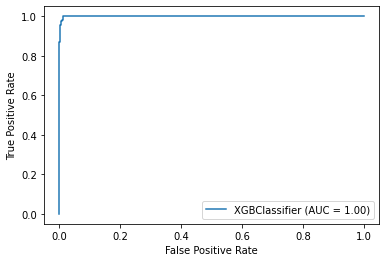

In [ ]:
xgb = plot_roc_curve(baseline, test_numeric, y_test_LE) 
xgb_tunned = plot_roc_curve(best_model, test_numeric, y_test_LE) 
print('Curva ROC para XGBoost Classifier \n')

Curva PR para XGBoost Classifier 



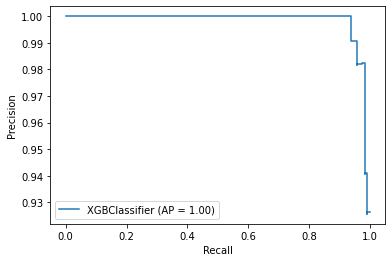

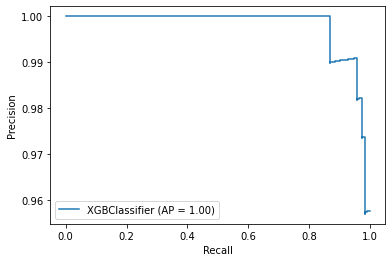

In [ ]:
xgb = plot_precision_recall_curve(baseline, test_numeric, y_test_LE)
xgb_tuned = plot_precision_recall_curve(best_model, test_numeric, y_test_LE)
print('Curva PR para XGBoost Classifier \n')

### XGBoost vs Random Forest

Ambos métodos son muy potentes y la superioridad de uno u otro depende del problema al que se apliquen. Algunos aspectos a tener en cuenta son:

* Gracias al out-of-bag error, el método de Random Forest no necesita recurrir a validación cruzada para la optimización de sus hiperparámetros. Esto puede ser una ventaja muy importante cuando los requerimientos computacionales son limitantes. Esta característica también está presente en Stochastic Gradient Boosting pero no en AdaBoost y Gradient Boosting.

* Random forest tiene menos hiperparámetros, lo que hace más sencillo su correcta implementación.

* Si existe una proporción alta de predictores irrelevantes, Random Forest puede verse perjudicado, sobre todo a medida que se reduce el número de predictores (m) evaluados. Supóngase que, de 100 predictores, 90 de ellos no aportan información (son ruidos). Si el hiperparámetro m es igual a 3 (en cada división se evalúan 3 predictores aleatorios), es muy probable que los 3 predictores seleccionados sean de los que no aportan nada. Aun así, el algoritmo seleccionará el mejor de ellos, incorporándolo al modelo. Cuanto mayor sea el porcentaje de predictores no relevantes, mayor la frecuencia con la que esto ocurre, por lo que los árboles que forman el Random Forest contendrán predictores irrelevantes. Como consecuencia, se reduce su capacidad predictiva. En el caso de Gradient Boosting Trees, siempre se evalúan todos los predictores, por lo que los no relevantes se ignoran.

* En Random Forest, cada modelo que forma el ensemble es independiente del resto, esto permite que el entrenamiento sea paralelizable.

* Random Forest no sufre problemas de overfitting por muchos árboles que se agreguen.

* Si se realiza una buena optimización de hiperparámetros, Gradient Boosting Trees suele obtener resultados superiores.

Fuente: https://www.cienciadedatos.net/documentos/py09_gradient_boosting_python.html


## Conclusiones Boosting

Mediante el algoritmo de XGBoostClassifier() disponible en el paquete de XGBoost (https://xgboost.readthedocs.io/en/latest/index.html) se realizó una clasificación de las muestras con/sin barbijo. 
La optimización de hiperparámetros se realizó mediante una librería scikit-optimize que nos permite realizar optimización bayesiana. 

Con o sin tunning de hiperparámetros se logró el mismo resultado en TRAIN y TEST, lo que da cuenta de que no vale la pena en optimizar hiperpárametros mediante scikit-optimize ya que demanda mayor tiempo de cálculo (milisegundos vs. 20-30 minutos aprox). 

Concluimos que el dataset es simple para resolver las clases (con/sin barbijo) lo que nos permite valores altos de métricas. 

